<a href="https://colab.research.google.com/github/julianamo93/CP02-Pt1-Keras/blob/main/CP02_IA_Ex_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de Dados - Pima Diabetes Database
Diagnóstico médico: Diabetes no povo Pima

Esse dataset contém dados sobre incidência de diabetes em mulheres do Povo Pima (índios nativos norte americanos originários do atual Estado do Arizona). Contém 8 atributos biomédicos para 768 entradas anonimizadas, sendo 500 testados negativo para diabetes e 268 testados positivo para diabetes.

Estudo realizado utilizando uma Rede Neural com Keras para prever Diabetes

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

# Parte 2: Importação dos dados e Análise Exploratória

In [ ]:
# Carregando o dataset e visualizando os dados
data = pd.read_csv('diabetes.csv')
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Visualizando as primeiras linhas
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Verificando os dados das colunas
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Verificando os dados do shape
data.shape

(768, 9)

# Gráfico Boxplot

Ideal para detectar outliers e visualizar a dispersão dos dados por atributo. Serve também pode mostrar a mediana e o intervalo interquartil dos campos numéricos.

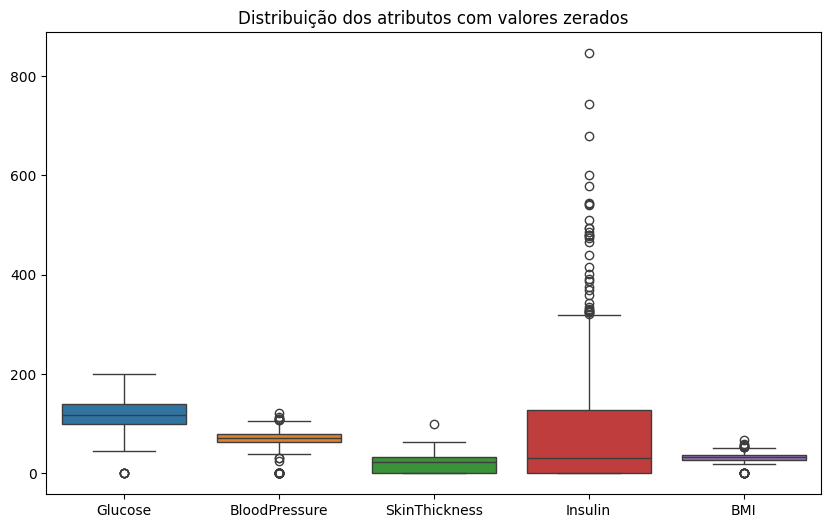

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data[zero])
plt.title('Distribuição dos atributos com valores zerados')
plt.show()


Conforme visto acima, existem vários campos com valores zerados, especialmente para SkinThickness e Insulin. Alguns desses dados podem ser importantes e nos ajudar na previsão de diabetes, portanto, não podemos remover todos eles.

Vamos remover alguns para nos ajudar na análise e depois adiciona-los novamente na média.


In [ ]:
#Vamos verificar a quantidade de campos zerados

zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

def qtd_zero(data, fields):
    for field in fields:
        print('Quantidade de Zeros em %s: %d' % (field, len(data.loc[ data[field] == 0, field ])))

qtd_zero(data, zero)

Quantidade de Zeros em Glucose: 5
Quantidade de Zeros em BloodPressure: 35
Quantidade de Zeros em SkinThickness: 227
Quantidade de Zeros em Insulin: 374
Quantidade de Zeros em BMI: 11


Vamos dividir os dados em conjunto de teste e treinamento.

In [ ]:
# Separando em Train/Test
datafeatures = list(data.columns.values)
datafeatures.remove('Outcome')
print(datafeatures)

# Dados de entrada (X) e saída (y)
X = data[datafeatures]
y = data['Outcome']


['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)

(576, 8)
(192, 8)


In [ ]:
# Corrigindo os campos zerados no conjunto e utilizando a média.
def substZeroPorMedia(dados, campo):
    valores_nao_zero = dados.loc[dados[campo] != 0, campo]
    media = np.sum(valores_nao_zero) / len(valores_nao_zero)
    qtd_zeros = len(dados.loc[dados[campo] == 0, campo])  # quantidade de entradas com valor 0
    dados.loc[dados[campo] == 0, campo] = media

    print('%s - Corrigido %d valores com a média: %.3f' % (campo, qtd_zeros, media))


In [ ]:
# Aplicando na camada de Treino
for field in zero:
    substZeroPorMedia(X_train, field)

Glucose - Corrigido 4 valores com a média: 122.003
BloodPressure - Corrigido 25 valores com a média: 72.846
SkinThickness - Corrigido 163 valores com a média: 29.465
Insulin - Corrigido 270 valores com a média: 158.464
BMI - Corrigido 8 valores com a média: 32.663


In [ ]:
#Agora vamos verificar novamente a quantidade de campos zerados

qtd_zero(X_train, zero)

Quantidade de Zeros em Glucose: 0
Quantidade de Zeros em BloodPressure: 0
Quantidade de Zeros em SkinThickness: 0
Quantidade de Zeros em Insulin: 0
Quantidade de Zeros em BMI: 0


In [ ]:
# # Aplicando na camada de Teste
for field in zero:
    substZeroPorMedia(X_test, field)

Glucose - Corrigido 1 valores com a média: 120.738
BloodPressure - Corrigido 10 valores com a média: 71.071
SkinThickness - Corrigido 64 valores com a média: 28.148
Insulin - Corrigido 104 valores com a média: 145.409
BMI - Corrigido 3 valores com a média: 31.841


In [ ]:
# Treinando os valores
X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values

#Criando a Rede Neural


In [ ]:
#Construindo o Modelo
modeloRNA = Sequential()

# Hidden Layer 1 ---------> 12 neurônios
modeloRNA.add(Dense(12, kernel_initializer='uniform', activation='relu', input_dim=8))

# Hidden Layer 2 ---------> 8 neurônios
modeloRNA.add(Dense(8, kernel_initializer='uniform', activation='relu'))

# Hidden Layer 3 ---------> 1 neurônios
modeloRNA.add(Dense(1, kernel_initializer='uniform', activation='sigmoid' ))


In [ ]:
# Resumo da arquitetura
modeloRNA.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilando o modelo
modeloRNA.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Trainando a Rede Neural e definindo uma váriavel para que possamos visualizar em gráfico posteriormente.
grafico = modeloRNA.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=1000,
              batch_size=16)


Epoch 1/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4780 - loss: 0.6935 - val_accuracy: 0.6771 - val_loss: 0.6852
Epoch 2/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6446 - loss: 0.6834 - val_accuracy: 0.6771 - val_loss: 0.6625
Epoch 3/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6372 - loss: 0.6700 - val_accuracy: 0.6771 - val_loss: 0.6533
Epoch 4/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6307 - loss: 0.6645 - val_accuracy: 0.6771 - val_loss: 0.6369
Epoch 5/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6548 - loss: 0.6443 - val_accuracy: 0.6719 - val_loss: 0.6241
Epoch 6/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6624 - loss: 0.6318 - val_accuracy: 0.6979 - val_loss: 0.6285
Epoch 7/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6791 - loss: 0.6278 - val_accuracy: 0.7135 - val_loss: 0.6062
Epoch 8/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6869 - loss: 0.6045 - val_accuracy: 0

In [ ]:
#Previsão
y_predict = modeloRNA.predict(X_test)
y_predict

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[9.73862886e-01],
       [1.82024285e-01],
       [9.52526480e-02],
       [8.29556763e-01],
       [2.27001742e-01],
       [4.00622375e-02],
       [8.64587843e-01],
       [9.10206676e-01],
       [6.32524490e-01],
       [4.88913834e-01],
       [7.22738504e-01],
       [9.79562521e-01],
       [2.07250059e-01],
       [1.65057063e-01],
       [1.61374226e-01],
       [2.59708047e-01],
       [9.07699049e-01],
       [6.72260160e-03],
       [5.94952703e-01],
       [2.02251062e-01],
       [5.90106905e-01],
       [4.37039286e-01],
       [4.52326909e-02],
       [3.96332209e-04],
       [1.20217698e-02],
       [4.33019370e-01],
       [1.13662919e-02],
       [8.82241428e-01],
       [4.94554266e-02],
       [1.48733184e-01],
       [5.84370732e-01],
       [3.77682030e-01],
       [3.46692726e-02],
       [5.98171890e-01],
       [7.85733983e-02],
       [7.73297966e-01],
       [6.27658963e-01],
       [6.84745517e-03],
       [9.54877257e-01],
       [7.01368153e-01],


In [ ]:
# Avaliando o modelo na divisão de TESTE
loss, accuracy = modeloRNA.evaluate(X_test, y_test)

print(f'Accuracy do modelo no conjunto de teste: {accuracy * 100:.2f}%')


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7806 - loss: 0.4513  
Accuracy do modelo no conjunto de teste: 76.04%


In [ ]:
# Avaliando o modelo na divisão de TREINO
loss, accuracy = modeloRNA.evaluate(X_train, y_train)

print(f'Accuracy do modelo no conjunto de treino: {accuracy * 100:.2f}%')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8277 - loss: 0.3781 
Accuracy do modelo no conjunto de treino: 82.29%


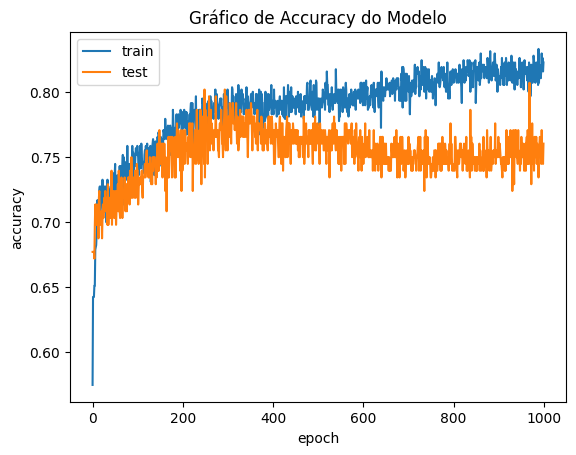

In [ ]:
# Gráfico de Accuracy do Modelo após treinamento da Rede Neural
plt.plot(grafico.history['accuracy'])
plt.plot(grafico.history['val_accuracy'])
plt.title('Gráfico de Accuracy do Modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

#Conclusão

Após o estudo realizado, obtemos uma precisão média em torno de **79%**.


---------------------------------

*   O modelo não apresentou melhorias significativas após 300 epochs, e observou-se um sinal de overfitting após 500 epochs.

Isso sugere que o modelo pode ter um bom desempenho no conjunto de treinamento, mas falha em generalizar adequadamente para novos dados, resultando em um desempenho inferior no conjunto de teste ou em dados não vistos.


--------------------------------------------

*   O conjunto de teste ainda trouxe uma boa accuracy devido a divisão dos dados.

Portanto, recomenda-se considerar estratégias como regularização, ajuste do número de epochs, ou a utilização de modelos mais simples para melhorar a capacidade de generalização do modelo.

